In [1]:
import os
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.1


In [3]:
for dirpath, dirnames, filenames in os.walk("chest_xray"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'chest_xray'.
There are 2 directories and 0 images in 'chest_xray\test'.
There are 0 directories and 234 images in 'chest_xray\test\NORMAL'.
There are 0 directories and 390 images in 'chest_xray\test\PNEUMONIA'.
There are 2 directories and 0 images in 'chest_xray\train'.
There are 0 directories and 1341 images in 'chest_xray\train\NORMAL'.
There are 0 directories and 3875 images in 'chest_xray\train\PNEUMONIA'.
There are 2 directories and 0 images in 'chest_xray\val'.
There are 0 directories and 8 images in 'chest_xray\val\NORMAL'.
There are 0 directories and 8 images in 'chest_xray\val\PNEUMONIA'.


In [4]:
num_of_normal_images = len(os.listdir("chest_xray/train/NORMAL"))
print("Number of NORMAL images in training dataset: " + str(num_of_normal_images))

Number of NORMAL images in training dataset: 1341


In [5]:
num_of_pneumonia_images = len(os.listdir("chest_xray/train/PNEUMONIA"))
print("Number of PNEUMONIA images in training dataset: " + str(num_of_pneumonia_images))

Number of PNEUMONIA images in training dataset: 3875


In [6]:
num_of_normal_images_testing = len(os.listdir("chest_xray/test/NORMAL"))
print("Number of NORMAL images in testing dataset: " + str(num_of_normal_images_testing))

Number of NORMAL images in testing dataset: 234


In [7]:
num_of_pneumonia_images_testing = len(os.listdir("chest_xray/test/PNEUMONIA"))
print("Number of PNEUMONIA images in testing dataset: " + str(num_of_pneumonia_images_testing))

Number of PNEUMONIA images in testing dataset: 390


In [8]:
seed = 42
IMAGE_SIZE = 150
BATCH_SIZE = 50

train_dir = "chest_xray/train/"
test_dir = "chest_xray/test/"

train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=BATCH_SIZE,
                                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        color_mode = 'grayscale',
                                                        seed = seed)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=BATCH_SIZE,
                                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        color_mode = 'grayscale',
                                                        seed = seed)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1,0.1),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="same"),
    
        
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="same"),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="same"),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="same"),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding="same"),

    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 150, 150, 1)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 1)       0         
                                                                 
 random_translation (RandomT  (None, 150, 150, 1)      0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 150, 150, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      3

In [10]:
lr = 1e-4
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3)
lr_sch = tf.keras.callbacks.LearningRateScheduler(lambda x: lr * 0.95 ** x)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics=["accuracy"])

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1,
                              patience=2, min_lr=0.0000001)

In [13]:
history = model.fit(
    x = train_data,
    epochs=6,
    validation_data=test_data,   
    callbacks=[lr_sch])

Epoch 1/6
105/105 [==============================] - 95s 820ms/step - loss: 0.3071 - accuracy: 0.8762 - val_loss: 0.8715 - val_accuracy: 0.6250 - lr: 1.0000e-04
Epoch 2/6
105/105 [==============================] - 87s 823ms/step - loss: 0.1913 - accuracy: 0.9266 - val_loss: 1.6135 - val_accuracy: 0.6250 - lr: 9.5000e-05
Epoch 3/6
105/105 [==============================] - 87s 826ms/step - loss: 0.1828 - accuracy: 0.9283 - val_loss: 1.5701 - val_accuracy: 0.6250 - lr: 9.0250e-05
Epoch 4/6
105/105 [==============================] - 87s 824ms/step - loss: 0.1622 - accuracy: 0.9411 - val_loss: 1.5258 - val_accuracy: 0.6250 - lr: 8.5737e-05
Epoch 5/6
105/105 [==============================] - 88s 837ms/step - loss: 0.1533 - accuracy: 0.9444 - val_loss: 0.6691 - val_accuracy: 0.7163 - lr: 8.1451e-05
Epoch 6/6
105/105 [==============================] - 89s 844ms/step - loss: 0.1486 - accuracy: 0.9431 - val_loss: 0.3187 - val_accuracy: 0.8846 - lr: 7.7378e-05


In [14]:
import itertools
import matplotlib.pyplot as plt

In [15]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

  # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

  # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

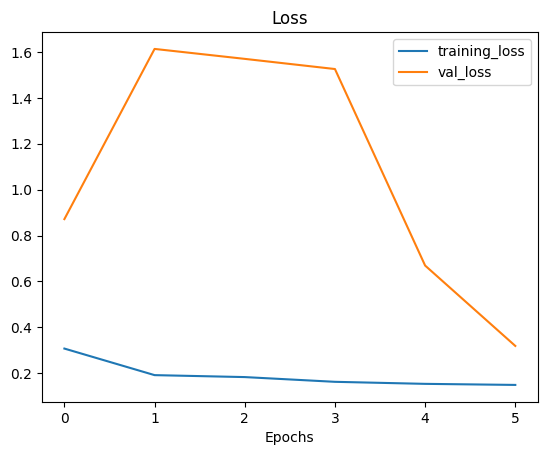

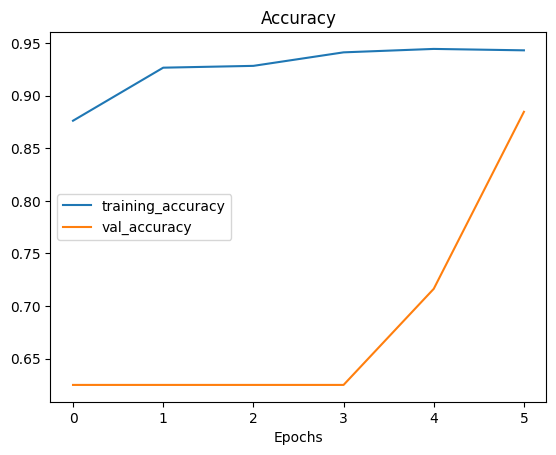

In [16]:
plot_loss_curves(history)

In [17]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Loss del test',test_loss)
print('Accuracy del test', test_accuracy)

13/13 [==============================] - 1s 33ms/step - loss: 0.3187 - accuracy: 0.8846
Loss del test 0.3186607360839844
Accuracy del test 0.8846153616905212


In [18]:
model.save("PNEUMONIA")

INFO:tensorflow:Assets written to: PNEUMONIA\assets


INFO:tensorflow:Assets written to: PNEUMONIA\assets
